# Tutorial on video analysis

In [1]:
# Import Libraries
from matplotlib import pyplot as plt # To Visualize
import ffmpeg                        # To Handle Video
import numpy as np                   # To Handle Array
import os                            # To Handle OS
import cv2                           # To Handle Image/Video

### Get Video Information

In [2]:
# Load Video
vid = cv2.VideoCapture('sample_vid.avi') 
print('Height of the frames : {}'.format(vid.get(3)))
print('Width of the frames : {}'.format(vid.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 25.0
Total frames included in the video : 119.0


## Convert Video to the Video with Different Frame Rate (FPS)

In [3]:
# First form
if os.path.exists('downsample_vid.avi'):
    os.remove('downsample_vid.avi')
(
    ffmpeg
    .input('sample_vid.avi') 
    .filter('fps', fps=10, round='up')
    .output('downsample_vid.avi')
    .run()
)

(None, None)

## Check the Difference

In [4]:
vid = cv2.VideoCapture('downsample_vid.avi')
print('Height of the frames : {}'.format(vid.get(3)))
print('Width of the frames : {}'.format(vid.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 10.0
Total frames included in the video : 49.0


## Extract frames from the video with scaling

In [5]:
# Second form
ffmpeg.input('sample_vid.avi').filter('fps', fps=5, round='up').filter('scale',200,100).output('frames/frame_%02d.jpg').run()

(None, None)

['frame_01.jpg', 'frame_02.jpg', 'frame_03.jpg', 'frame_04.jpg', 'frame_05.jpg', 'frame_06.jpg']


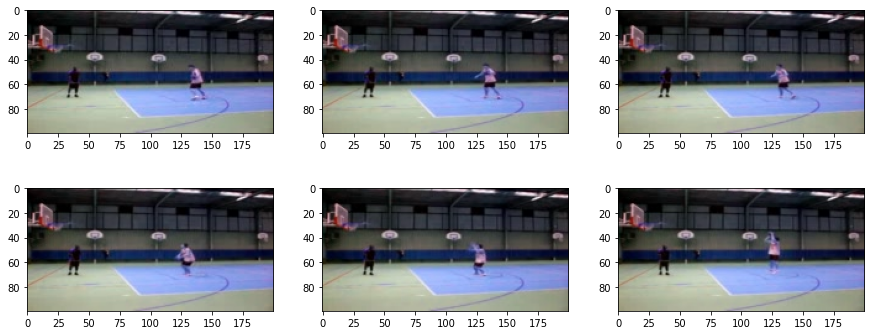

In [6]:
# Visualizing the extrated frames
frames = sorted(os.listdir('frames'))[1:7]
print(frames)
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
axs = axs.ravel()

for i in range(len(frames)):
    img_path = os.path.join('frames',frames[i])
    img = cv2.imread(img_path)
    axs[i].imshow(img.astype(np.uint8))

# Optical Flow

In [7]:
def ToImg(raw_flow,bound):
    '''
    this function scale the input pixels to 0-255 with bi-bound
    raw_flow: input raw pixel value (not in 0-255)
    bound: upper and lower bound (-bound, bound)
    :return: pixel value scale from 0 to 255
    '''
    flow=raw_flow
    flow[flow>bound]=bound
    flow[flow<-bound]=-bound
    flow-=-bound
    flow*=(255/float(2*bound))
    return flow

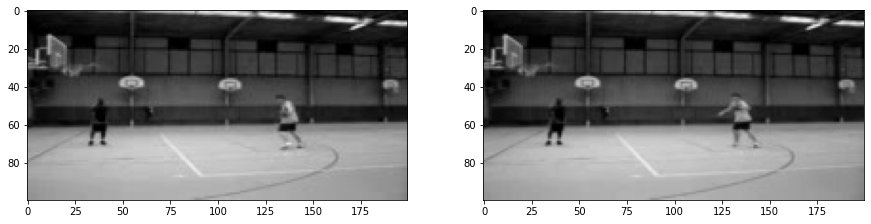

In [8]:
# Extract the TVL1 optical flow from the first 2 frames
frame_0 = os.path.join('frames', frames[0])
frame_0 = cv2.imread(frame_0,0)
frame_1 = os.path.join('frames', frames[1])
frame_1 = cv2.imread(frame_1,0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(frame_0, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(frame_1, cmap='gray', vmin=0, vmax=255)

In [9]:
bound = 20
dtvl1=cv2.createOptFlow_DualTVL1()
flowDTVL1=dtvl1.calc(frame_0,frame_1,None)

flow_x=ToImg(flowDTVL1[...,0],bound) # Motion difference along the X axis 
flow_y=ToImg(flowDTVL1[...,1],bound) # Motion difference along the Y axis


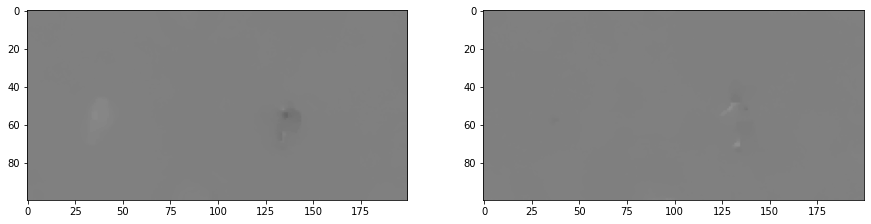

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(flow_x, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(flow_y, cmap='gray', vmin=0, vmax=255)

# EXERCISE 1 : 
Use sample_vid2.avi, extract "flipped & center cropped" frames with 5fps, and extract optical flow frames 

In [11]:
vid2 = cv2.VideoCapture('sample_vid2.avi')
print('Height of the frames : {}'.format(vid2.get(3)))
print('Width of the frames : {}'.format(vid2.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid2.get(5)))
print('Total frames included in the video : {}'.format(vid2.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 29.97002997002997
Total frames included in the video : 201.0


In [12]:
'''
TO DO:
Following the example above, extract optical flow frames
1) 5fps
2) Horizontally flipped : hflip()
3) center cropped (100,100) : crop(x,y,width,height)
'''

'\nTO DO:\nFollowing the example above, extract optical flow frames\n1) 5fps\n2) Horizontally flipped : hflip()\n3) center cropped (100,100) : crop(x,y,width,height)\n'

In [13]:
'''
1) Run FFmpeg here
'''
(   
    ffmpeg
    .input('sample_vid.avi') 
    .filter('fps', fps=5, round='up')
    .hflip()
    .crop(110, 70, 100, 100)
    .output('frames/frame_%02d.jpg')
    .run()
)
(   
    ffmpeg
    .input('sample_vid.avi') 
    .filter('fps', fps=5, round='up')    
    .output('frames/frame_o_%02d.jpg')
    .run()
)

(None, None)

In [14]:
vid = cv2.VideoCapture('downsample_vid.avi')
print('Height of the frames : {}'.format(vid.get(3)))
print('Width of the frames : {}'.format(vid.get(4)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 320.0
Width of the frames : 240.0
Frame rates (FPS) of the video : 10.0
Total frames included in the video : 49.0


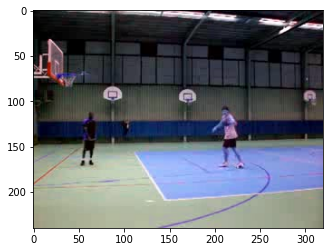

In [15]:
frame_o = cv2.imread('frames/frame_o_02.jpg')
plt.imshow(frame_o)

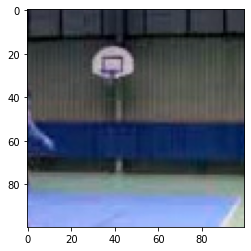

In [16]:
frame = cv2.imread('frames/frame_02.jpg')
plt.imshow(frame)

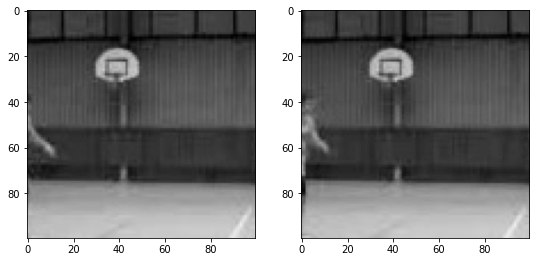

In [17]:
'''
2) Extract Optical Flow Frames
'''
# Extract the TVL1 optical flow from the first 2 frames
frame_0 = cv2.imread('frames/frame_02.jpg', 0)
frame_1 = cv2.imread('frames/frame_03.jpg', 0)

fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs[0].imshow(frame_0, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(frame_1, cmap='gray', vmin=0, vmax=255)

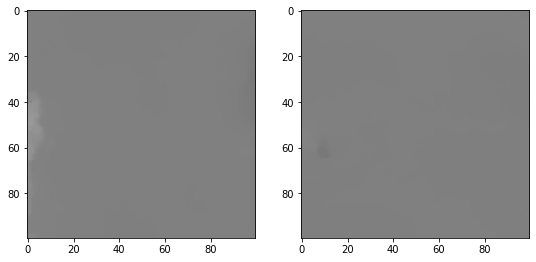

In [18]:
flowDTVL1=dtvl1.calc(frame_0,frame_1,None)

flow_x=ToImg(flowDTVL1[...,0],bound) # Motion difference along the X axis 
flow_y=ToImg(flowDTVL1[...,1],bound) # Motion difference along the Y axis

fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs[0].imshow(flow_x, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(flow_y, cmap='gray', vmin=0, vmax=255)